In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

# Tạo thư mục kaggle và chép file config vào
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Tạo thư mục đích nếu chưa có
!kaggle datasets download -d immulu/bigearthnetv2-reference-maps

!mkdir -p ./lable_metadata

# Giải nén chỉ 1 file: metadata.parquet
!unzip bigearthnetv2-reference-maps.zip "metadata.parquet" -d ./lable_metadata

Dataset URL: https://www.kaggle.com/datasets/immulu/bigearthnetv2-reference-maps
License(s): Community Data License Agreement - Permissive - Version 1.0
 99% 643M/651M [00:04<00:00, 115MB/s] 
100% 651M/651M [00:04<00:00, 158MB/s]
Archive:  bigearthnetv2-reference-maps.zip
  inflating: ./lable_metadata/metadata.parquet  


In [ ]:
!unzip "/content/drive/MyDrive/Document for Capstone/bigearthnet_12band_10m.zip" -d /content/

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_41_60_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_85_77_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_24_70_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_78_86_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_14_53_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R0

In [ ]:
!unzip "/content/drive/MyDrive/Document for Capstone/bigearthnet_12band_10m_1.zip" -d /content/

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_35_31_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_64_20_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_15_73_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_20_25_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_64_81_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094

In [ ]:
# Di chuyển toàn bộ nội dung từ bigearthnet_12band_10m_1 vào bigearthnet_12band_10m
!mv /content/content/bigearthnet_12band_10m_1/* /content/content/bigearthnet_12band_10m/

# (Tuỳ chọn) Xoá thư mục rỗng bigearthnet_12band_10m_1
!rmdir /content/content/bigearthnet_12band_10m_1

In [ ]:
# !ls -d content/
# check tên
# /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_12band.tif

In [ ]:
import pandas as pd

# Đường dẫn đến file metadata.parquet đã giải nén
parquet_path = './lable_metadata/metadata.parquet'

# Đọc file parquet
df = pd.read_parquet(parquet_path)

print(df.columns)

Index(['patch_id', 'labels', 'split', 'country', 's1_name', 's2v1_name',
       'contains_seasonal_snow', 'contains_cloud_or_shadow'],
      dtype='object')


In [ ]:
df["labels"][15]

array(['Arable land', 'Broad-leaved forest', 'Inland waters', 'Pastures',
       'Urban fabric'], dtype=object)

In [ ]:
from collections import Counter
from itertools import chain

# Chuỗi các nhãn được gộp thành 1 danh sách lớn (flattened list)
all_labels = list(chain.from_iterable(df['labels']))

# Đếm tần suất xuất hiện của từng nhãn
label_counts = Counter(all_labels)

# In ra số nhãn duy nhất
print("Số lượng nhãn duy nhất:", len(label_counts))

# In ra danh sách và số lần xuất hiện
print("\nTần suất xuất hiện của từng nhãn:")
for label, count in label_counts.most_common():
    print(f"{label:40s}: {count}")


Số lượng nhãn duy nhất: 19

Tần suất xuất hiện của từng nhãn:
Arable land                             : 188025
Mixed forest                            : 165780
Coniferous forest                       : 154941
Transitional woodland, shrub            : 141150
Broad-leaved forest                     : 135928
Land principally occupied by agriculture, with significant areas of natural vegetation: 122709
Complex cultivation patterns            : 99598
Pastures                                : 95605
Urban fabric                            : 63758
Inland waters                           : 63212
Marine waters                           : 61832
Agro-forestry areas                     : 33181
Permanent crops                         : 29588
Inland wetlands                         : 20919
Moors, heathland and sclerophyllous vegetation: 13894
Natural grassland and sparsely vegetated areas: 11882
Industrial or commercial units          : 11142
Coastal wetlands                        : 1397
Beaches, du

In [ ]:
import pandas as pd
import numpy as np

# Đọc file metadata.parquet
parquet_path = './lable_metadata/metadata.parquet'
df = pd.read_parquet(parquet_path)

# Danh sách 19 lớp chuẩn
class_list = [
    'Arable land',
    'Mixed forest',
    'Coniferous forest',
    'Transitional woodland, shrub',
    'Broad-leaved forest',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Complex cultivation patterns',
    'Pastures',
    'Urban fabric',
    'Inland waters',
    'Marine waters',
    'Agro-forestry areas',
    'Permanent crops',
    'Inland wetlands',
    'Moors, heathland and sclerophyllous vegetation',
    'Natural grassland and sparsely vegetated areas',
    'Industrial or commercial units',
    'Coastal wetlands',
    'Beaches, dunes, sands'
]

# Tạo ánh xạ từ tên nhãn sang chỉ số
label_to_idx = {label: i for i, label in enumerate(class_list)}

# Hàm chuyển danh sách nhãn thành vector 19 chiều
def encode_labels(label_list):
    vec = np.zeros(len(class_list), dtype=int)
    for label in label_list:
        if label in label_to_idx:
            vec[label_to_idx[label]] = 1
    return vec.tolist()

# Ghi đè cột 'labels' bằng vector 19 chiều (multi-hot)
df['labels'] = df['labels'].apply(encode_labels)

# Kiểm tra kết quả
print(df.head())

# (Tùy chọn) Lưu lại file parquet hoặc CSV
df.to_parquet('metadata_multilabel_encoded.parquet')


                                            patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                              labels split  country  \
0  [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...  test  Austria   
1  [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
2  [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
3  [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
4  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   

                                        s1_name  \
0  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57   
1  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55   
2  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56   
3  S1B_IW_GRDH_1SDV_20170612T165

In [ ]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [ ]:
import os

# Đường dẫn thư mục chứa ảnh đa phổ đã xử lý
data_dir = "/content/content/bigearthnet_12band_10m"

class_counts = {}
total_images = 0

for label in sorted(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, label)
    if os.path.isdir(class_path):
        n_files = len([f for f in os.listdir(class_path) if f.endswith('.tif')])
        class_counts[label] = n_files
        total_images += n_files

# In kết quả
print("Số lượng ảnh mỗi class:")
for label, count in class_counts.items():
    print(f"Class {label}: {count} ảnh")

print(f"\nTổng số ảnh: {total_images}")

Số lượng ảnh mỗi class:
Class S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP: 3305 ảnh
Class S2A_MSIL2A_20170613T101031_N9999_R022_T34VER: 6686 ảnh
Class S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU: 7986 ảnh
Class S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK: 7997 ảnh
Class S2A_MSIL2A_20170704T112111_N9999_R037_T29SND: 8216 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPA: 370 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPV: 6013 ảnh
Class S2A_MSIL2A_20170720T100031_N9999_R122_T34UDG: 1540 ảnh
Class S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20170813T112121_N9999_R037_T29SNC: 8222 ảnh
Class S2A_MSIL2A_20170818T103021_N9999_R108_T32TMT: 4888 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL: 8229 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35WPN: 2292 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCS: 627 ảnh
Class S2A_MSIL2A_20171002T112111_N9999_R037_T29SNB: 8165 ảnh
Cl

In [ ]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [ ]:
!pip install rasterio

Shape của ảnh S2A_MSIL2A_20171002T094031_N9999_R036_T34TCS_61_82_12band.tif: (12, 120, 120) (channels, height, width)


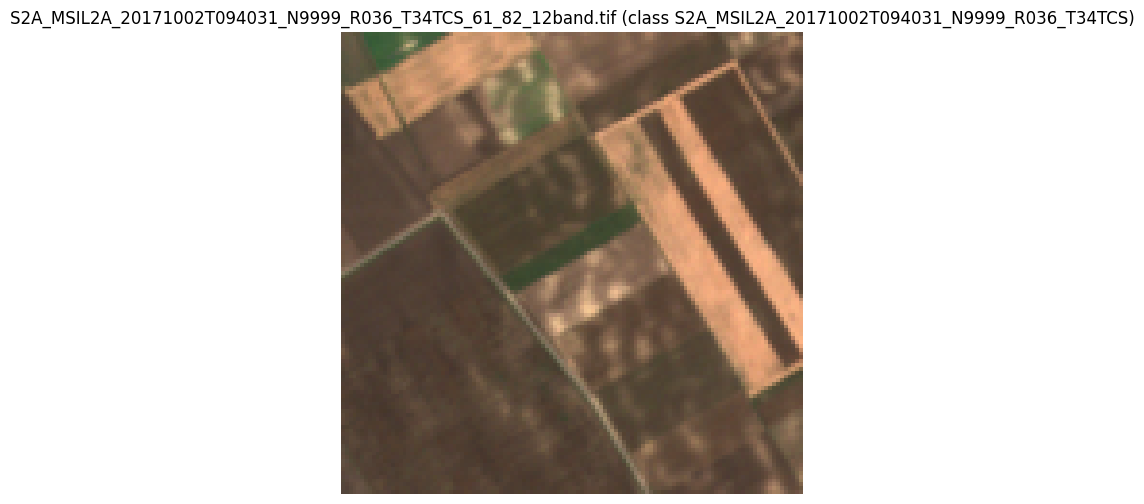

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import random

# Chọn ngẫu nhiên 1 class và 1 ảnh trong class
random_class = random.choice(os.listdir(data_dir))
img_path = os.path.join(data_dir, random_class)
random_img = random.choice([f for f in os.listdir(img_path) if f.endswith('.tif')])
img_full_path = os.path.join(img_path, random_img)

# Đọc ảnh
with rasterio.open(img_full_path) as src:
    img = src.read()  # shape: (12, H, W)

# In shape
print(f"Shape của ảnh {random_img}: {img.shape} (channels, height, width)")

# Hiển thị ảnh (dùng band 4,3,2 tương ứng RGB)
rgb = np.stack([img[3], img[2], img[1]], axis=-1)  # Chú ý chỉ số bắt đầu từ 0
rgb = rgb.astype(np.float32)
rgb /= np.max(rgb) + 1e-6  # Chuẩn hóa để hiển thị

plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"{random_img} (class {random_class})")
plt.axis('off')
plt.show()


In [ ]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from glob import glob

# 1. Đường dẫn gốc chứa các thư mục con
IMAGE_DIR = "/content/content/bigearthnet_12band_10m"

# 2. Đọc metadata chứa patch_id và labels
# df = pd.read_parquet("./lable_metadata/metadata.parquet")

# 3. Duyệt toàn bộ ảnh trong thư mục con, tạo ánh xạ patch_id → đường dẫn ảnh
tif_paths = glob(os.path.join(IMAGE_DIR, "*", "*_12band.tif"))

patch_to_path = {
    os.path.basename(path).replace("_12band.tif", ""): path
    for path in tif_paths
}

# 4. Giữ lại các patch_id có ảnh thật sự
df = df[df['patch_id'].isin(patch_to_path)]

# 5. Gán cột image_path theo ánh xạ tìm được
df['image_path'] = df['patch_id'].map(patch_to_path)

# 6. Chia ngẫu nhiên train/val/test (70/15/15)
train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42)

# 7. Tạo danh sách (image_path, labels)
train_list = list(zip(train_df['image_path'], train_df['labels']))
val_list = list(zip(val_df['image_path'], val_df['labels']))
test_list = list(zip(test_df['image_path'], test_df['labels']))

# 8. In kết quả
print(f"Số ảnh train: {len(train_list)}")
print(f"Số ảnh val:   {len(val_list)}")
print(f"Số ảnh test:  {len(test_list)}")

df.head()

/tmp/ipython-input-18-3882315738.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image_path'] = df['patch_id'].map(patch_to_path)


Số ảnh train: 71741
Số ảnh val:   15377
Số ảnh test:  15374


patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                              labels split  country  \
0  [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...  test  Austria   
1  [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
2  [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
3  [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
4  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   

                                        s1_name  \
0  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57   
1  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55   
2  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56   
3  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_57   
4  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_58   

                          s2v1_name  contains_seasonal_snow  \
0  S2A_MSIL2A_20170613T101031_26_57                   False   
1  S2A_MSIL2A_20170613T101031_27_55                   False   
2  S2A_MSIL2A_20170613T101031_27_56                   False   
3  S2A_MSIL2A_20170613T101031_27_57                   False   
4  S2A_MSIL2A_20170613T101031_27_58                   False   

   contains_cloud_or_shadow                                         image_path  
0                     False  /content/content/bigearthnet_12band_10m/S2A_MS...  
1                     False  /content/content/bigearthnet_12band_10m/S2A_MS...  
2                     False  /content/content/bigearthnet_12band_10m/S2A_MS...  
3                     False  /content/content/bigearthnet_12band_10m/S2A_MS...  
4                     False  /content/content/bigearthnet_12band_10m/S2A_MS...

In [ ]:
train_list[0]

('/content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR_64_29_12band.tif',
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Kiểm tra những ảnh KHÔNG có trong metadata
tif_patch_ids = set([os.path.basename(p).replace('_12band.tif', '') for p in tif_paths])
metadata_patch_ids = set(df['patch_id'].tolist())

missing_from_metadata = tif_patch_ids - metadata_patch_ids
print(f"Số ảnh KHÔNG có metadata: {len(missing_from_metadata)}")


Số ảnh KHÔNG có metadata: 9718


In [ ]:
# Số ảnh thực sự trong thư mục
print("Tổng số file ảnh .tif:", len(tif_paths))

# Số patch_id có metadata
print("Tổng số patch_id trong metadata:", len(df))

# Số ảnh tồn tại đồng thời cả trong thư mục và metadata
common_ids = set(df['patch_id']).intersection(set(patch_to_path))
print("Số patch_id khớp được cả metadata và ảnh:", len(common_ids))


Tổng số file ảnh .tif: 112210
Tổng số patch_id trong metadata: 102492
Số patch_id khớp được cả metadata và ảnh: 102492


In [ ]:
import os
from glob import glob

# 1. Đường dẫn thư mục ảnh
IMAGE_DIR = "/content/content/bigearthnet_12band_10m"

# 2. Lấy tất cả file .tif (ảnh 12 band) trong mọi thư mục con
tif_paths = glob(os.path.join(IMAGE_DIR, "*", "*_12band.tif"))

# 3. Lấy patch_id từ tên file
tif_patch_ids = set(os.path.basename(p).replace('_12band.tif', '') for p in tif_paths)

# 4. Lấy patch_id từ metadata
import pandas as pd
df = pd.read_parquet("./lable_metadata/metadata.parquet")
metadata_patch_ids = set(df['patch_id'].tolist())

# 5. Tìm ảnh bị thiếu trong metadata
missing_patch_ids = tif_patch_ids - metadata_patch_ids

# 6. In số lượng và một vài ví dụ
print(f"Số ảnh .tif không có metadata: {len(missing_patch_ids)}")
print("Ví dụ các ảnh bị thiếu:")
for pid in list(missing_patch_ids)[:10]:
    print(f"- {pid}_12band.tif")


Số ảnh .tif không có metadata: 9718
Ví dụ các ảnh bị thiếu:
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_70_33_12band.tif
- S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK_14_51_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_06_01_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_06_15_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_17_78_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_25_36_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_70_76_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_43_36_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_29_59_12band.tif
- S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK_88_58_12band.tif


In [ ]:
import pandas as pd

# Đọc metadata
df = pd.read_parquet('./lable_metadata/metadata.parquet')

# Patch cần kiểm tra
patch_id = "S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK_69_71"

# Kiểm tra tồn tại
exists = patch_id in df['patch_id'].values
print(f"Tồn tại trong metadata: {'Có' if exists else 'Không'}")


Tồn tại trong metadata: Không


In [ ]:
!pip install albumentations

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([
    A.Resize(224, 224),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=0.0, std=1.0, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=True),
])

val_transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=[0]*12, std=[1]*12, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=False)
])


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
from torch.utils.data import Dataset
import torch
import tifffile as tiff

class BigEarthNetDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        img_path, label = self.data_list[idx]

        with rasterio.open(img_path) as src:
            image = src.read()  # (12, H, W)

        image = image.astype(np.float32) / 10000.0
        image = np.transpose(image, (1, 2, 0))  # (H, W, C) cho Albumentations

        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        else:
            image = torch.tensor(np.transpose(image, (2, 0, 1)))  # (C, H, W)

        label = np.array(label, dtype=np.float32)  # ép kiểu numeric
        label = torch.tensor(label, dtype=torch.float32)

        return image, label


In [ ]:
from torch.utils.data import DataLoader

# Batch size
BATCH_SIZE = 64

# Dataset
train_dataset = BigEarthNetDataset(train_list, transform=train_transform)
val_dataset = BigEarthNetDataset(val_list, transform=val_transform)
test_dataset = BigEarthNetDataset(test_list, transform=val_transform)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
train_dataset[0][1].shape

torch.Size([19])

Label Tensor: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: 10
Non-zero class count: 1.0


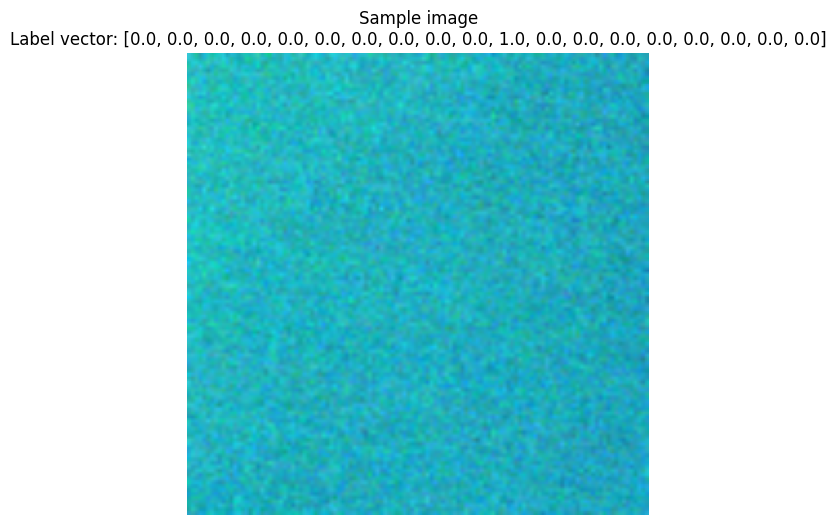

In [ ]:
# Lấy 1 mẫu bất kỳ từ train_dataset
sample_img, sample_label = train_dataset[5]

# Kiểm tra thông tin label
print("Label Tensor:", sample_label)
print("Shape:", sample_label.shape)
print("Non-zero class indices:", torch.nonzero(sample_label).squeeze().tolist())
print("Non-zero class count:", torch.sum(sample_label).item())

# Chuyển tensor về numpy để hiển thị
sample_img_np = sample_img.numpy().transpose(1, 2, 0)  # (H, W, C)

# Lấy lại các band RGB (band 4, 3, 2 --> index 3, 2, 1)
rgb = sample_img_np[:, :, [3, 2, 1]]

# Chuẩn hóa về [0, 1] nếu cần (nếu bạn đã normalize thì giá trị có thể lệch)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)

# Hiển thị ảnh
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"Sample image\nLabel vector: {sample_label.tolist()}")
plt.axis("off")
plt.show()


VIT

In [ ]:
!pip install timm

In [ ]:
import timm
import torch.nn as nn
import torch

# Load ViT Hybrid pretrained
model = timm.create_model("vit_base_r50_s16_224", pretrained=True)

# Sửa Conv2d đầu tiên của ResNet50 backbone để nhận 12 bands
old_conv = model.patch_embed.backbone.stem[0]
new_conv = nn.Conv2d(
    in_channels=12,
    out_channels=old_conv.out_channels,
    kernel_size=old_conv.kernel_size,
    stride=old_conv.stride,
    padding=old_conv.padding,
    bias=False
)

# Copy pretrained weights: replicate 3-channel weights to 12 channels
with torch.no_grad():
    old_weight = old_conv.weight  # Shape: (out_channels, 3, kH, kW)
    # Repeat weights 4 times to get 12 channels (3 * 4 = 12)
    new_weight = old_weight.repeat(1, 4, 1, 1) / 4.0  # Normalize
    new_conv.weight[:, :12, :, :] = new_weight[:, :12, :, :]

model.patch_embed.backbone.stem[0] = new_conv

# Thay thế head cho 19 nhãn multi-label
num_features = model.num_features
model.head = nn.Sequential(
    nn.Linear(num_features, 19),
    nn.Sigmoid()
)

# Đưa model lên GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print("ViT Hybrid fixed: 12-band input, 19-class output (pretrained weights extended).")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


ViT Hybrid fixed: 12-band input, 19-class output (pretrained weights extended).


In [ ]:
import torch.optim as optim

# Loss cho multi-label classification
criterion = nn.BCELoss()

# Optimizer (AdamW thường dùng với ViT)
optimizer = optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-4)

# Optional: Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)


In [ ]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0, save_path="my_pytorch_model_bigearth_1.pth.pth"):
        """
        patience: số epoch không cải thiện trước khi dừng
        delta: mức cải thiện tối thiểu được coi là tốt hơn
        save_path: nơi lưu model tốt nhất
        """
        self.patience = patience
        self.delta = delta
        self.save_path = save_path
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def __call__(self, val_loss, model):
        score = -val_loss  # vì nhỏ hơn là tốt hơn

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f" EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0  # reset counter

    def save_checkpoint(self, val_loss, model):
        torch.save(model.state_dict(), self.save_path)
        print(f" Saved best model (val_loss={val_loss:.4f})")
        torch.save(model, '/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth')


In [ ]:
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for images, labels in dataloader:
        images = images.to(device)
        labels = torch.tensor(labels, dtype=torch.float32).to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)


def validate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = torch.tensor(labels, dtype=torch.float32).to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            all_preds.append(outputs.cpu())
            all_labels.append(labels.cpu())

    return total_loss / len(dataloader)


In [ ]:
sample_img, sample_label = train_dataset[0]
print(f"Type image: {type(sample_img)}, shape: {getattr(sample_img, 'shape', None)}, dtype: {getattr(sample_img, 'dtype', None)}")
print(f"Type label: {type(sample_label)}, shape: {getattr(sample_label, 'shape', None)}, dtype: {getattr(sample_label, 'dtype', None)}")


Type image: <class 'torch.Tensor'>, shape: torch.Size([12, 224, 224]), dtype: torch.float32
Type label: <class 'torch.Tensor'>, shape: torch.Size([19]), dtype: torch.float32


In [ ]:
import gc

early_stopping = EarlyStopping(patience=3, delta=0.001, save_path="vit_best_model.pth")

NUM_EPOCHS = 10
device = "cuda" if torch.cuda.is_available() else "cpu"

for epoch in range(NUM_EPOCHS):
    train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss = validate(model, val_loader, criterion, device)

    scheduler.step()

    print(f"Epoch {epoch+1}/{NUM_EPOCHS}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

    early_stopping(val_loss, model)

    # Giải phóng bộ nhớ
    torch.cuda.empty_cache()
    gc.collect()

    if early_stopping.early_stop:
        print("🛑 Early stopping triggered!")
        break


/tmp/ipython-input-28-3067176591.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)
/tmp/ipython-input-28-3067176591.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32).to(device)


Epoch 1/10: Train Loss = 0.1949, Val Loss = 0.1613
✅ Saved best model (val_loss=0.1613)
Epoch 2/10: Train Loss = 0.1608, Val Loss = 0.1615
🔴 EarlyStopping counter: 1/3
Epoch 3/10: Train Loss = 0.1516, Val Loss = 0.1466
✅ Saved best model (val_loss=0.1466)
Epoch 4/10: Train Loss = 0.1451, Val Loss = 0.1432
✅ Saved best model (val_loss=0.1432)
Epoch 5/10: Train Loss = 0.1399, Val Loss = 0.1411
✅ Saved best model (val_loss=0.1411)
Epoch 6/10: Train Loss = 0.1250, Val Loss = 0.1334
✅ Saved best model (val_loss=0.1334)
Epoch 7/10: Train Loss = 0.1173, Val Loss = 0.1329
🔴 EarlyStopping counter: 1/3
Epoch 8/10: Train Loss = 0.1086, Val Loss = 0.1332
🔴 EarlyStopping counter: 2/3
Epoch 9/10: Train Loss = 0.0979, Val Loss = 0.1369
🔴 EarlyStopping counter: 3/3
🛑 Early stopping triggered!


In [ ]:
# torch.save(model.state_dict(), "vit_bigearthnet0707.pth")

In [ ]:
# torch.save(model, '/content/drive/MyDrive/my_pytorch_model_bigearth.pth')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Luôn dùng CPU
device = torch.device("cpu")
print(" Using device:", device)

# Load model ViT đã huấn luyện (trên CPU)
# model_path = "/content/drive/MyDrive/Document for Capstone/Model/Vit_Bigearthnet_mAP.pth"
model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()
print("Model loaded and moved to", device)
print(model.head)

random_image = torch.rand((12, 224, 224), dtype=torch.float32)

with torch.no_grad():
    output = model(random_image.unsqueeze(0))
    predicted = (output.squeeze() > 0.5).cpu().numpy()  # Threshold 0.5 để multi-label

# print("Predicted Labels (binary vector):\n", predicted)
print("Output sigmoid:\n", output.squeeze().cpu().numpy())
print("Predicted Labels:\n", predicted)

⚡ Using device: cpu
Model loaded and moved to cpu
Sequential(
  (0): Linear(in_features=768, out_features=19, bias=True)
  (1): Sigmoid()
)
Output sigmoid:
 [6.19767234e-04 3.03059496e-04 4.30376967e-04 7.45817088e-04
 3.41567153e-04 3.20090709e-04 2.81309796e-04 1.40193879e-04
 2.23710740e-04 5.56734251e-03 9.91888702e-01 8.60403525e-05
 1.14941045e-04 1.19391654e-04 1.11620087e-04 3.03794932e-05
 1.09750908e-04 3.17180784e-05 1.64295634e-05]
Predicted Labels:
 [False False False False False False False False False False  True False
 False False False False False False False]


⚡ Using device: cpu
Model loaded and moved to cpu
11150
True Labels (binary vector):
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Output sigmoid:
 [9.9603206e-01 3.3425144e-03 1.2009433e-03 1.5486805e-01 4.6423265e-01
 2.9477514e-02 5.7352176e-03 5.4886648e-03 1.4917416e-03 6.5867888e-04
 1.3282769e-05 6.3116645e-04 4.3513533e-03 4.7783062e-04 4.1007555e-05
 3.5793058e-04 3.0645028e-02 2.2009313e-05 1.3006322e-05]
Predicted Labels:
 [ True False False False False False False False False False False False
 False False False False False False False]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


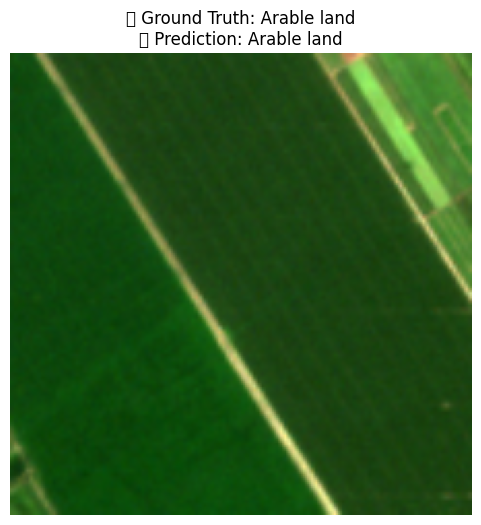

3602
True Labels (binary vector):
 [1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Output sigmoid:
 [2.52399653e-01 1.52854979e-01 9.48795676e-01 2.21455485e-01
 8.47476423e-02 2.46141508e-01 3.16871256e-02 9.92878377e-01
 1.53674325e-02 5.08332101e-04 2.22363567e-04 1.65554404e-04
 3.29052913e-04 7.82359112e-03 4.57691289e-02 1.35763013e-03
 1.65466961e-04 3.45407607e-04 5.48333162e-04]
Predicted Labels:
 [False False  True False False False False  True False False False False
 False False False False False False False]


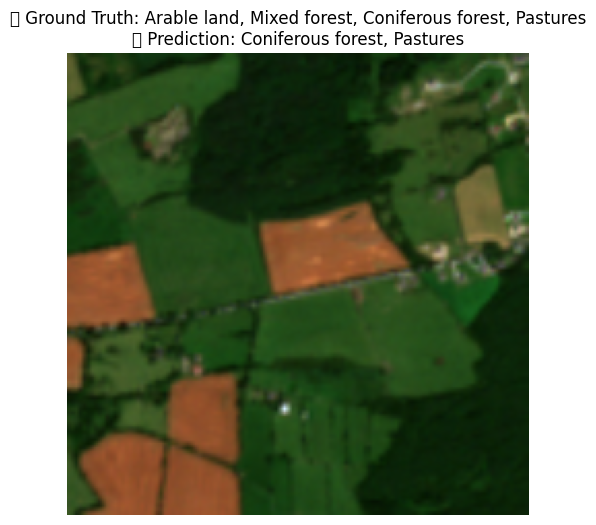

1480
True Labels (binary vector):
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Output sigmoid:
 [5.2066274e-02 5.0491211e-03 3.3439379e-03 1.2433776e-02 9.6637430e-03
 6.1296690e-02 3.4233406e-02 7.7379569e-02 9.9818015e-01 3.4684730e-03
 1.9523730e-04 4.1775635e-04 1.0436634e-03 9.3600191e-03 6.0377095e-04
 4.3611214e-04 7.9812336e-01 3.8295542e-04 6.8160752e-04]
Predicted Labels:
 [False False False False False False False False  True False False False
 False False False False  True False False]


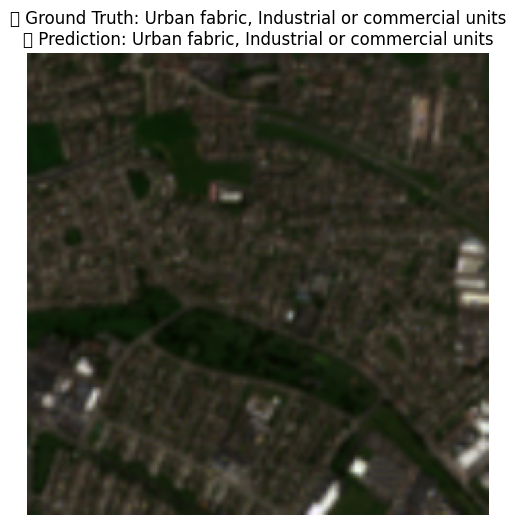

13634
True Labels (binary vector):
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Output sigmoid:
 [2.1137156e-02 6.4410561e-01 9.9323928e-01 5.8801651e-01 2.5400817e-02
 7.1926571e-02 3.1150164e-04 4.6660780e-04 7.2608574e-04 1.3157752e-01
 3.1336449e-04 2.1989593e-04 9.6143936e-05 3.1684734e-02 1.4336003e-04
 3.0691892e-05 4.9901463e-04 5.6925448e-05 3.1955224e-05]
Predicted Labels:
 [False  True  True  True False False False False False False False False
 False False False False False False False]


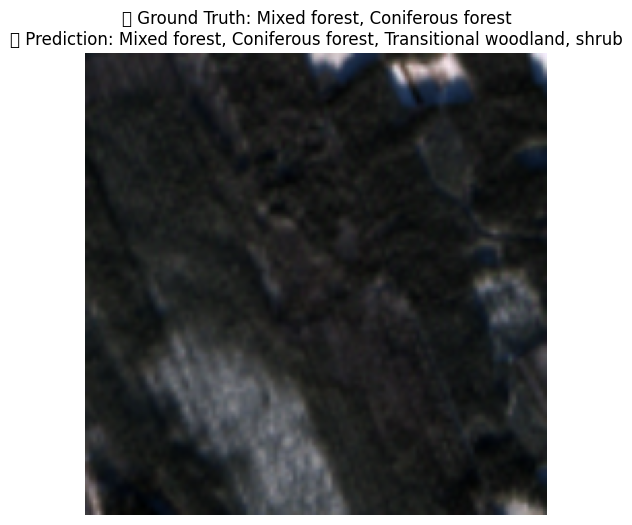

10115
True Labels (binary vector):
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Output sigmoid:
 [7.6648496e-02 9.8237795e-01 8.8954502e-01 8.7910193e-01 2.2625123e-01
 4.6954861e-01 1.2396685e-03 7.4667449e-04 3.7592640e-03 3.9668295e-01
 5.8275752e-04 1.3332246e-04 4.9603736e-04 6.1870411e-02 2.4264475e-04
 3.4282170e-04 7.3721743e-04 5.0316215e-04 5.5201181e-05]
Predicted Labels:
 [False  True  True  True False False False False False False False False
 False False False False False False False]


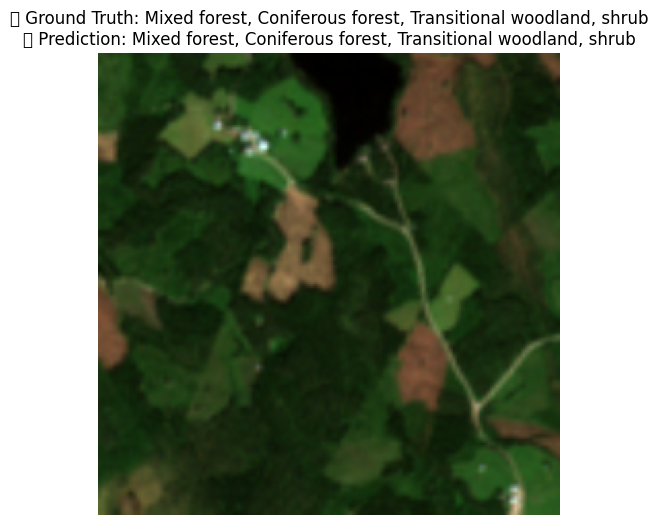

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# # Đặt device
# model = torch.load("/content/drive/MyDrive/Document for Capstone/Model/Vit_Bigearthnet_mAP.pth", weights_only=False)
# model.eval()
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

# Luôn dùng CPU
device = torch.device("cpu")
print(" Using device:", device)

# Load model ViT đã huấn luyện (trên CPU)
# model_path = "/content/drive/MyDrive/Document for Capstone/Model/Vit_Bigearthnet_mAP.pth"
model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()
print("Model loaded and moved to", device)

# Danh sách class BigEarthNet
class_list = [
    'Arable land',
    'Mixed forest',
    'Coniferous forest',
    'Transitional woodland, shrub',
    'Broad-leaved forest',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Complex cultivation patterns',
    'Pastures',
    'Urban fabric',
    'Inland waters',
    'Marine waters',
    'Agro-forestry areas',
    'Permanent crops',
    'Inland wetlands',
    'Moors, heathland and sclerophyllous vegetation',
    'Natural grassland and sparsely vegetated areas',
    'Industrial or commercial units',
    'Coastal wetlands',
    'Beaches, dunes, sands'
]


def show_sample_prediction(dataset, index):
    image, true_labels = dataset[index]
    input_tensor = image.unsqueeze(0).to(device)  # (1, C, H, W)

    # Dự đoán
    with torch.no_grad():
        output = model(input_tensor)
        predicted = (output.squeeze() > 0.5).cpu().numpy()  # Threshold 0.5 để multi-label

    # Hiển thị ma trận nhãn gốc và predicted
    print("True Labels (binary vector):\n", true_labels.numpy())
    # print("Predicted Labels (binary vector):\n", predicted)
    print("Output sigmoid:\n", output.squeeze().cpu().numpy())
    print("Predicted Labels:\n", predicted)

    # Lấy tên nhãn
    true_label_names = [class_list[i] for i, val in enumerate(true_labels) if val == 1]
    predicted_label_names = [class_list[i] for i, val in enumerate(predicted) if val == 1]

    # Hiển thị ảnh (chọn RGB bands 4,3,2)
    img_np = image.cpu().numpy().transpose(1, 2, 0)
    rgb = img_np[:, :, [3, 2, 1]]  # Bands 4,3,2
    rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)  # Scale về [0,1]

    plt.figure(figsize=(6, 6))
    plt.imshow(rgb)
    plt.axis('off')
    plt.title("🌱 Ground Truth: {}\n🔮 Prediction: {}".format(
        ", ".join(true_label_names), ", ".join(predicted_label_names)))
    plt.show()

# Hiển thị 5 mẫu random từ test_dataset
import random
for _ in range(5):
    idx = random.randint(0, len(test_dataset) - 1)
    print(idx)
    show_sample_prediction(test_dataset, idx)


In [ ]:
from sklearn.metrics import (
    classification_report, multilabel_confusion_matrix, roc_auc_score,
    precision_recall_fscore_support, average_precision_score
)
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_path = "/content/drive/MyDrive/Document for Capstone/Model/Vit_Bigearthnet_mAP.pth"
model = torch.load(model_path, map_location=device, weights_only=False)

model = model.to(device)

def evaluate(model, dataloader, device, threshold=0.5):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            preds = (outputs > threshold).float()

            # all_preds.append(preds.cpu().numpy())
            all_preds.append(outputs.cpu().numpy())  # không threshold
            all_labels.append(labels.cpu().numpy())

    all_preds = np.vstack(all_preds)
    all_labels = np.vstack(all_labels)

    return all_preds, all_labels


# Run evaluation
preds, true_labels = evaluate(model, test_loader, device)

# Tính mAP (mean average precision)
# mAP = average_precision_score(true_labels, preds, average='macro')
mAP = average_precision_score(true_labels, preds, average='macro')

# Apply threshold
threshold = 0.5
preds = (preds >= threshold).astype(int)

# Tính Precision, Recall, F1 cho từng class
precision, recall, f1, _ = precision_recall_fscore_support(
    true_labels, preds, average=None, zero_division=0
)

# Tính macro average
macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
    true_labels, preds, average='macro', zero_division=0
)

# Tính micro average
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
    true_labels, preds, average='micro', zero_division=0
)

print("Macro Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}".format(
    macro_precision, macro_recall, macro_f1))
print("Micro Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}".format(
    micro_precision, micro_recall, micro_f1))

print(f"mAP (macro): {mAP:.4f}")

# Classification report cho từng class
class_names = class_list  # lấy từ đoạn code bạn có trước đó
print("\n Classification Report:")
print(classification_report(true_labels, preds, target_names=class_names, zero_division=0))


Macro Precision: 0.7912, Recall: 0.6527, F1: 0.7051
Micro Precision: 0.8054, Recall: 0.7055, F1: 0.7522
mAP (macro): 0.7687

 Classification Report:
                                                                                        precision    recall  f1-score   support

                                                                           Arable land       0.92      0.84      0.88      6441
                                                                          Mixed forest       0.77      0.72      0.74      5005
                                                                     Coniferous forest       0.89      0.63      0.74      5012
                                                          Transitional woodland, shrub       0.78      0.58      0.66      4401
                                                                   Broad-leaved forest       0.78      0.67      0.72      3007
Land principally occupied by agriculture, with significant areas of natural vegeta

In [ ]:
from sklearn.metrics import (
    classification_report, multilabel_confusion_matrix, roc_auc_score,
    precision_recall_fscore_support, average_precision_score
)
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

def evaluate(model, dataloader, device, threshold=0.5):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            preds = (outputs > threshold).float()

            # all_preds.append(preds.cpu().numpy())
            all_preds.append(outputs.cpu().numpy())  # không threshold
            all_labels.append(labels.cpu().numpy())

    all_preds = np.vstack(all_preds)
    all_labels = np.vstack(all_labels)

    return all_preds, all_labels


# Run evaluation
preds, true_labels = evaluate(model, test_loader, device)

# Tính mAP (mean average precision)
# mAP = average_precision_score(true_labels, preds, average='macro')
mAP = average_precision_score(true_labels, preds, average='macro')

# Apply threshold
threshold = 0.5
preds = (preds >= threshold).astype(int)

# Tính Precision, Recall, F1 cho từng class
precision, recall, f1, _ = precision_recall_fscore_support(
    true_labels, preds, average=None, zero_division=0
)

# Tính macro average
macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
    true_labels, preds, average='macro', zero_division=0
)

# Tính micro average
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
    true_labels, preds, average='micro', zero_division=0
)

print("Macro Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}".format(
    macro_precision, macro_recall, macro_f1))
print("Micro Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}".format(
    micro_precision, micro_recall, micro_f1))

print(f"mAP (macro): {mAP:.4f}")

# Classification report cho từng class
class_names = class_list  # lấy từ đoạn code bạn có trước đó
print("\n Classification Report:")
print(classification_report(true_labels, preds, target_names=class_names, zero_division=0))


Macro Precision: 0.8193, Recall: 0.6876, F1: 0.7427
Micro Precision: 0.8497, Recall: 0.7544, F1: 0.7992
mAP (macro): 0.8241

 Classification Report:
                                                                                        precision    recall  f1-score   support

                                                                           Arable land       0.90      0.87      0.88      6441
                                                                          Mixed forest       0.88      0.78      0.83      5005
                                                                     Coniferous forest       0.91      0.86      0.88      5012
                                                          Transitional woodland, shrub       0.74      0.67      0.70      4401
                                                                   Broad-leaved forest       0.80      0.67      0.73      3007
Land principally occupied by agriculture, with significant areas of natural vegeta

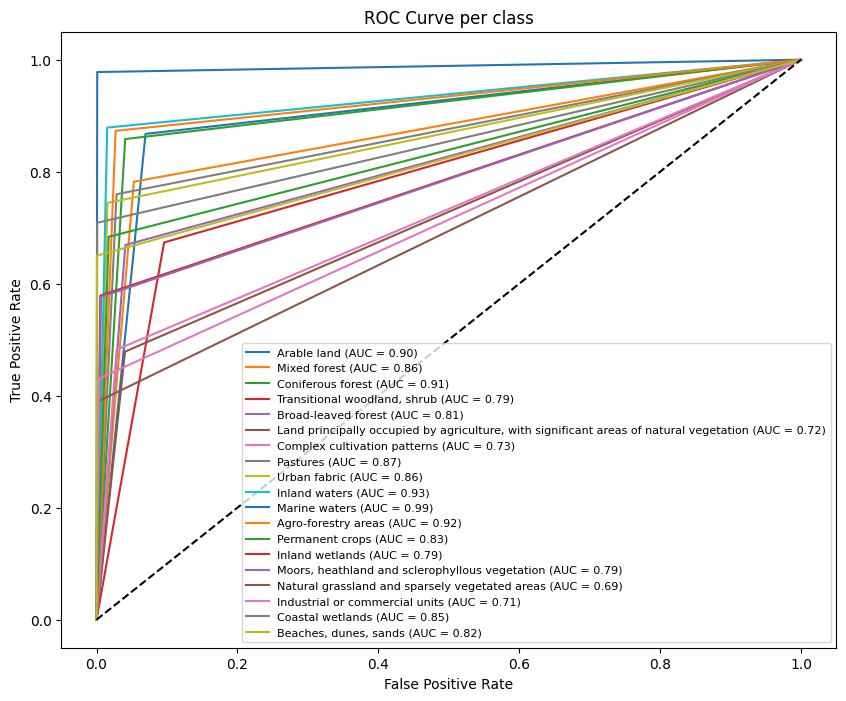

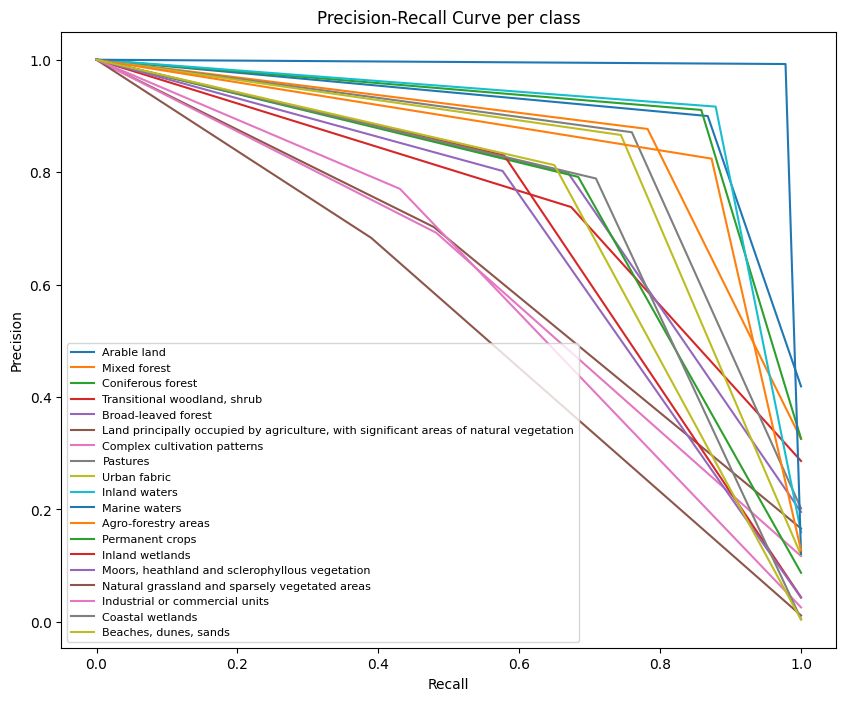

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# ROC Curve
plt.figure(figsize=(10, 8))
for i in range(len(class_list)):
    fpr, tpr, _ = roc_curve(true_labels[:, i], preds[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_list[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve per class")
plt.legend(fontsize=8)
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i in range(len(class_list)):
    precision, recall, _ = precision_recall_curve(true_labels[:, i], preds[:, i])
    plt.plot(recall, precision, label=f"{class_list[i]}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve per class")
plt.legend(fontsize=8)
plt.show()


In [ ]:
from sklearn.metrics import (
    hamming_loss, accuracy_score, precision_score, recall_score, f1_score,
    jaccard_score, average_precision_score
)
import numpy as np
import torch

# Giả sử bạn đã có model và test_loader
# model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        preds = outputs.cpu().numpy()
        all_preds.append(preds)
        all_labels.append(labels.numpy())

# Gộp tất cả batch lại
y_true = np.vstack(all_labels)  # Ground truth (N, C)
y_scores = np.vstack(all_preds) # Predicted scores (N, C)

# Áp ngưỡng threshold để lấy nhãn binary
threshold = 0.5
y_pred = (y_scores >= threshold).astype(int)

# 1. Hamming Loss
hamming = hamming_loss(y_true, y_pred)

# 2. Subset Accuracy (Exact Match Ratio)
exact_match = accuracy_score(y_true, y_pred)

# 3. Macro/Micro Precision, Recall, F1
macro_precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
macro_recall    = recall_score(y_true, y_pred, average='macro', zero_division=0)
macro_f1        = f1_score(y_true, y_pred, average='macro', zero_division=0)

micro_precision = precision_score(y_true, y_pred, average='micro', zero_division=0)
micro_recall    = recall_score(y_true, y_pred, average='micro', zero_division=0)
micro_f1        = f1_score(y_true, y_pred, average='micro', zero_division=0)

# 4. Jaccard Index (IoU)
jaccard_macro = jaccard_score(y_true, y_pred, average='macro', zero_division=0)
jaccard_micro = jaccard_score(y_true, y_pred, average='micro', zero_division=0)

# 5. Mean Average Precision (mAP)
mAP = average_precision_score(y_true, y_scores, average='macro')  # macro mAP

# In kết quả
print("Multi-label Evaluation Metrics:")
print(f"🔹 Hamming Loss               : {hamming:.4f}")
print(f"🔹 Subset Accuracy            : {exact_match:.4f}")
print(f"🔹 Macro Precision            : {macro_precision:.4f}")
print(f"🔹 Macro Recall               : {macro_recall:.4f}")
print(f"🔹 Macro F1                   : {macro_f1:.4f}")
print(f"🔹 Micro Precision            : {micro_precision:.4f}")
print(f"🔹 Micro Recall               : {micro_recall:.4f}")
print(f"🔹 Micro F1                   : {micro_f1:.4f}")
print(f"🔹 Jaccard Index (macro)      : {jaccard_macro:.4f}")
print(f"🔹 Jaccard Index (micro)      : {jaccard_micro:.4f}")
print(f"🔹 Mean Average Precision (mAP): {mAP:.4f}")


Multi-label Evaluation Metrics:
🔹 Hamming Loss               : 0.0555
🔹 Subset Accuracy            : 0.3963
🔹 Macro Precision            : 0.8193
🔹 Macro Recall               : 0.6876
🔹 Macro F1                   : 0.7427
🔹 Micro Precision            : 0.8497
🔹 Micro Recall               : 0.7544
🔹 Micro F1                   : 0.7992
🔹 Jaccard Index (macro)      : 0.6076
🔹 Jaccard Index (micro)      : 0.6656
🔹 Mean Average Precision (mAP): 0.8241


SHAP

In [ ]:
!pip install shap

In [ ]:
!pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

chạy riêng giải thích 12 bands cho từng class (kh for)

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# model_path = "/content/drive/MyDrive/Document for Capstone/Model/Vit_Bigearthnet_mAP.pth"
model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# 🔥 Chọn device: ưu tiên GPU nếu có
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()
print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 0  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = self.base_model(x)
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
# background_imgs, _ = next(iter(test_loader))
# background_imgs = background_imgs[:5].to(device)  # chỉ lấy 5 ảnh background

# Background & test images
background_imgs = []
num_needed = 5  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx
    mask = labels[:, class_idx] == 1  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# test_imgs, test_labels = test_dataset[8060]
# test_imgs = test_imgs.unsqueeze(0).to(device)  # thêm batch dim

# Tìm tất cả indices có chứa class_i
class_i_indices = [idx for idx in range(len(test_dataset))
                   if test_dataset[idx][1][class_idx] == 1]

# Chọn ngẫu nhiên 1 index từ danh sách đó
random_idx = random.choice(class_i_indices)

# Lấy ảnh và label
test_imgs, test_labels = test_dataset[random_idx]
test_imgs = test_imgs.unsqueeze(0).to(device)  # thêm batch dim

# Dự đoán cho ảnh được chọn
with torch.no_grad():

    probs = model(test_imgs)
    preds = (probs.squeeze() > 0.5).int()  # threshold 0.5

# Hiển thị true label và predicted label
print("True labels:    ", test_labels.numpy())
print("Predicted probs:", np.round(probs.numpy(), 3))
print("Predicted labels:", preds.numpy())
print(f"Class {class_idx} probability: {probs[0, class_idx].item():.4f}")

# debug
# show_sample_prediction(test_loader.dataset, 8060)

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)


Model loaded and moved to cpu
True labels:     [1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Predicted probs: [[0.69  0.071 0.009 0.666 0.264 0.025 0.229 0.897 0.173 0.002 0.    0.002
  0.018 0.833 0.005 0.064 0.019 0.022 0.002]]
Predicted labels: [1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
Class 0 probability: 0.6903
Calculating SHAP for class 0 ...


In [ ]:
# Remove chiều dư (nếu có)
shap_array = np.array(shap_values[0])
shap_array = np.squeeze(shap_array)  # (12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tính mean SHAP value theo H, W
mean_shap_per_band = np.abs(shap_array).mean(axis=(1, 2))  # shape (12,)
print("mean_shap_per_band shape:", mean_shap_per_band.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_shap_per_band)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean |SHAP value|')
plt.title(f'Band importance for class {class_idx}')
plt.show()


/tmp/ipython-input-84-2434029841.py:24: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


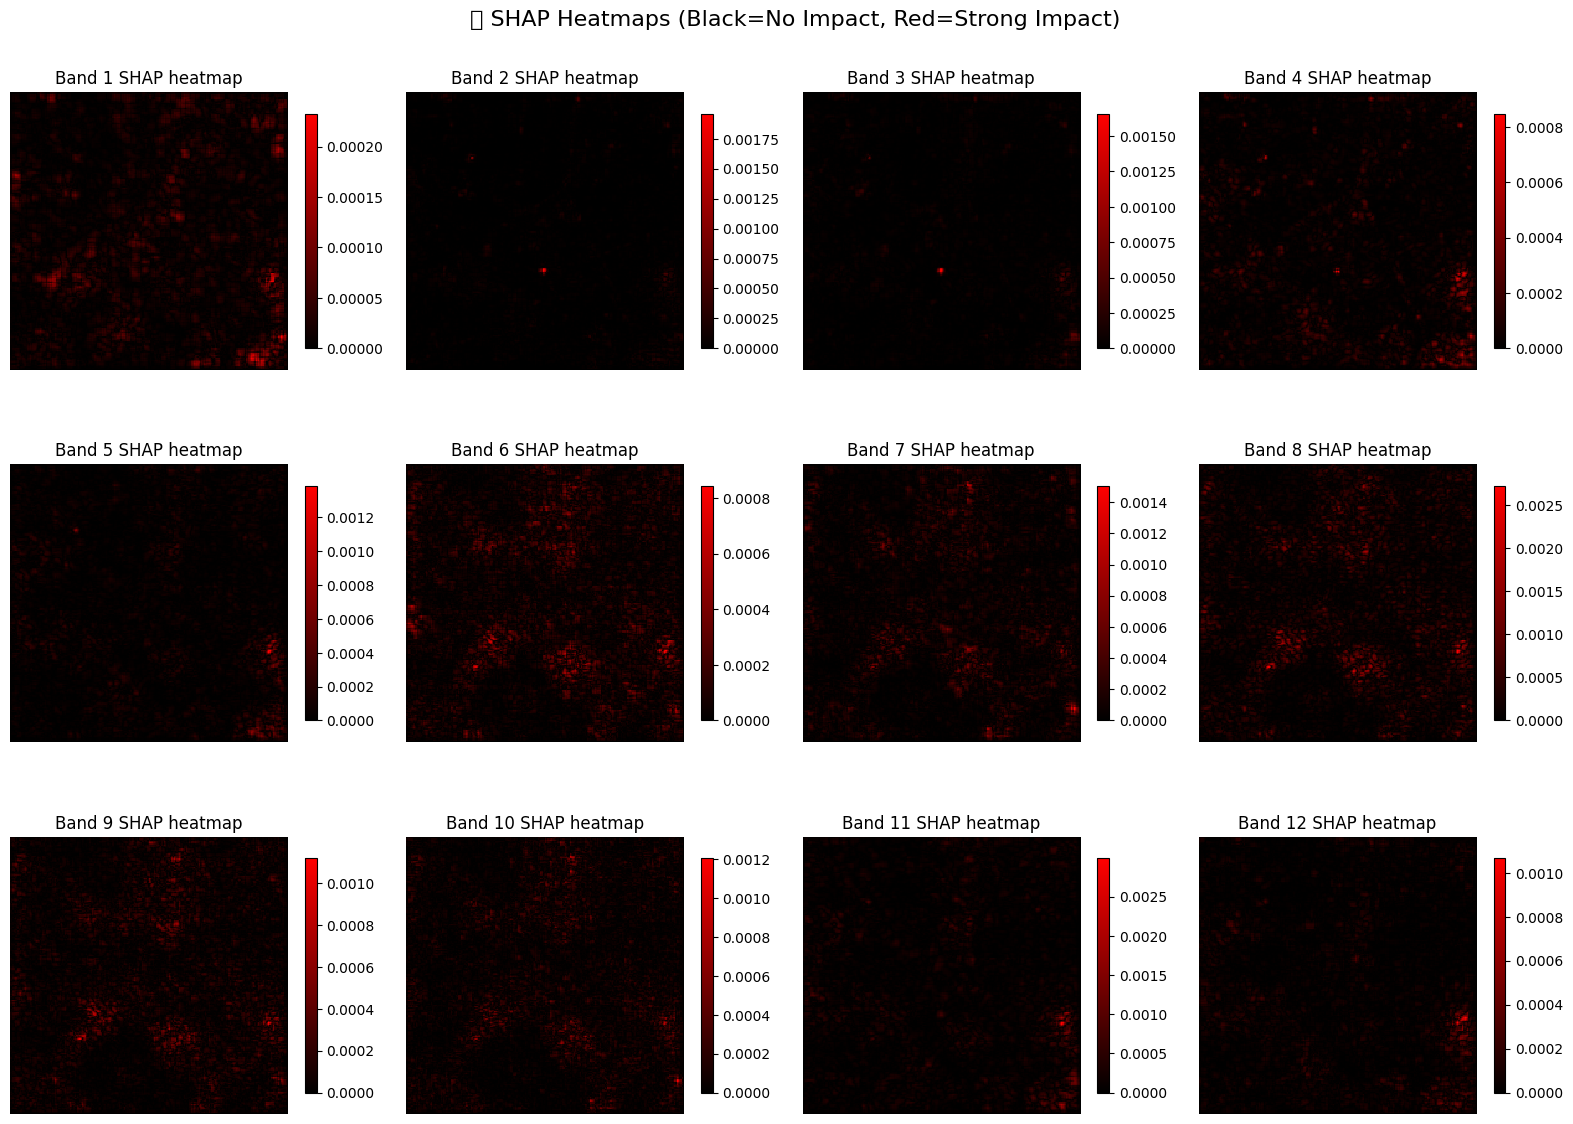

In [ ]:
import matplotlib.colors as mcolors

# Lấy array từ shap_values
shap_array = shap_values[0]  # shape: (12, H, W)

# Tạo custom colormap: black (0) -> red (high)
cmap = mcolors.LinearSegmentedColormap.from_list("black_red", ["black", "red"])

# Hiển thị heatmap cho từng band
num_bands = shap_array.shape[0]
fig, axes = plt.subplots(3, 4, figsize=(16, 12))  # 3 rows x 4 cols
axes = axes.flatten()

for i in range(num_bands):
    ax = axes[i]
    heatmap = np.abs(shap_array[i])  # lấy trị tuyệt đối cho impact

    im = ax.imshow(heatmap, cmap=cmap, interpolation='nearest')
    ax.set_title(f"Band {i+1} SHAP heatmap", fontsize=12)
    ax.axis('off')
    fig.colorbar(im, ax=ax, shrink=0.6)

plt.suptitle("🔥 SHAP Heatmaps (Black=No Impact, Red=Strong Impact)", fontsize=16)
plt.tight_layout()
plt.show()


🔥 Band 8 có mean |SHAP| cao nhất


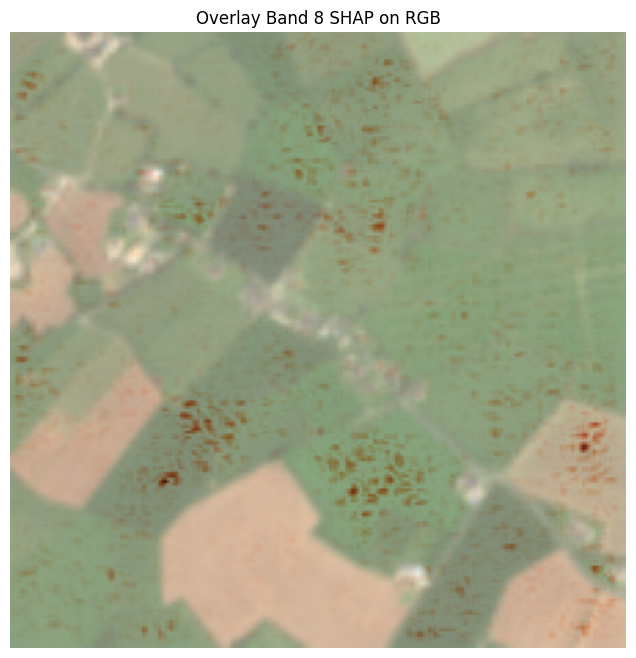

In [ ]:
# ✅ Lấy ảnh gốc
image_np = test_imgs.squeeze().cpu().numpy().transpose(1, 2, 0)  # (H, W, C)
rgb = image_np[:, :, [3, 2, 1]]  # Bands 4,3,2 (gần giống RGB)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)  # scale về [0,1]

# ✅ Tìm band có mean |SHAP| cao nhất
mean_shap_per_band = np.abs(shap_array).mean(axis=(1, 2))  # shape (12,)
top_band_idx = np.argmax(mean_shap_per_band)
print(f"🔥 Band {top_band_idx+1} có mean |SHAP| cao nhất")

# ✅ Lấy heatmap của band đó và scale
heatmap = np.abs(shap_array[top_band_idx])  # (H, W)
heatmap_norm = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-6)  # scale 0-1

# ✅ Overlay heatmap lên ảnh gốc
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.imshow(heatmap_norm, cmap="Reds", alpha=0.5)  # alpha=0.5 để thấy ảnh gốc
plt.axis('off')
plt.title(f"Overlay Band {top_band_idx+1} SHAP on RGB")
plt.show()
